# CHM673 

## Introduction to Python

In [2]:
#Algebra
2+2

4

In [3]:
#To save it, we assign it to a variable. 

E_hydrogen = -0.5  #H
E_ethylene = -80   #H

#We access the information with a print statement:

print(E_hydrogen)

-0.5


In [4]:
print(E_hydrogen)
E_hydrogen * 627 #Convert into Kcal/mol
print(E_hydrogen)

-0.5
-0.5


In [5]:
"""
Sometimes it may be convenient to overwrite the value of a variable. But you should think carefully about this and rather redefine a new variable. 
"""

print(E_hydrogen)
E_hydrogen_kcal = E_hydrogen * 627
print(E_hydrogen)
print(E_hydrogen_kcal)


-0.5
-0.5
-313.5


## Data types

In [6]:
#Float
type(E_hydrogen)

float

In [7]:
#Integer
E_hydrogen = 1
type(E_hydrogen)

int

In [8]:
#String
E_hydrogen = "Minus 5"
type(E_hydrogen)

str

In [9]:
#Lists
hydrogen = [E_hydrogen, E_hydrogen_kcal]
hydrogen[1]

-313.5

In [10]:
#Dictionary

hydrogen = {"Hartrees" : E_hydrogen, "Kcal/mol": E_hydrogen_kcal}
hydrogen["Hartrees"]

'Minus 5'

## Loops

In [11]:
print("For Loop")
for i in [0,1,2,3,4,5,6,7,8,9,10]:
    print(i)
    
    
print("While Loop")
j = 0
while j<10:
    print(j)
    j += 1

For Loop
0
1
2
3
4
5
6
7
8
9
10
While Loop
0
1
2
3
4
5
6
7
8
9


i = 0 
while i == 0:
    print(F"{i}>0")

## Numpy and Matplotlib

In [12]:
#Import module
import numpy as np               #where np is just the standard name
import matplotlib.pyplot as plt  # where plt is just the standard name

In [13]:
array = np.zeros(10) #New Array with 10 zeros
print(array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
#Assign value to an alement 
array[5] = 3
print(array)

[0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]


In [15]:
#Slicing. Add to several elements. 
array[0:5] = 3
print(array)

[3. 3. 3. 3. 3. 3. 0. 0. 0. 0.]


In [16]:
#Add to several elements
array[0:5] += 2
print(array)

[5. 5. 5. 5. 5. 3. 0. 0. 0. 0.]


In [17]:
#Create new array
array2 = 2* array
print(array2)

[10. 10. 10. 10. 10.  6.  0.  0.  0.  0.]


In [18]:
array2d = np.random.rand(4,4)
print(array2d)

print('\n')

#Print just the first row
print(array2d[0,:])

print('\n')

#Print first column
print(array2d[:,0])

print('\n')

#print last column
print(array2d[:,-1])

[[0.46897728 0.0634585  0.1927191  0.59111106]
 [0.4390222  0.0567481  0.89484809 0.10942886]
 [0.9087717  0.3366064  0.87593598 0.1662041 ]
 [0.19428937 0.61864052 0.78143303 0.67648151]]


[0.46897728 0.0634585  0.1927191  0.59111106]


[0.46897728 0.4390222  0.9087717  0.19428937]


[0.59111106 0.10942886 0.1662041  0.67648151]



### Numpy is extremely convenient to express functions $f(x)$ as $\{f(x_i)\}$ where $x \in a \le x \le b$

In [19]:
#Grids
x = np.linspace(-5,5, 200)
#Let us build a few functions

y = np.sin(x)

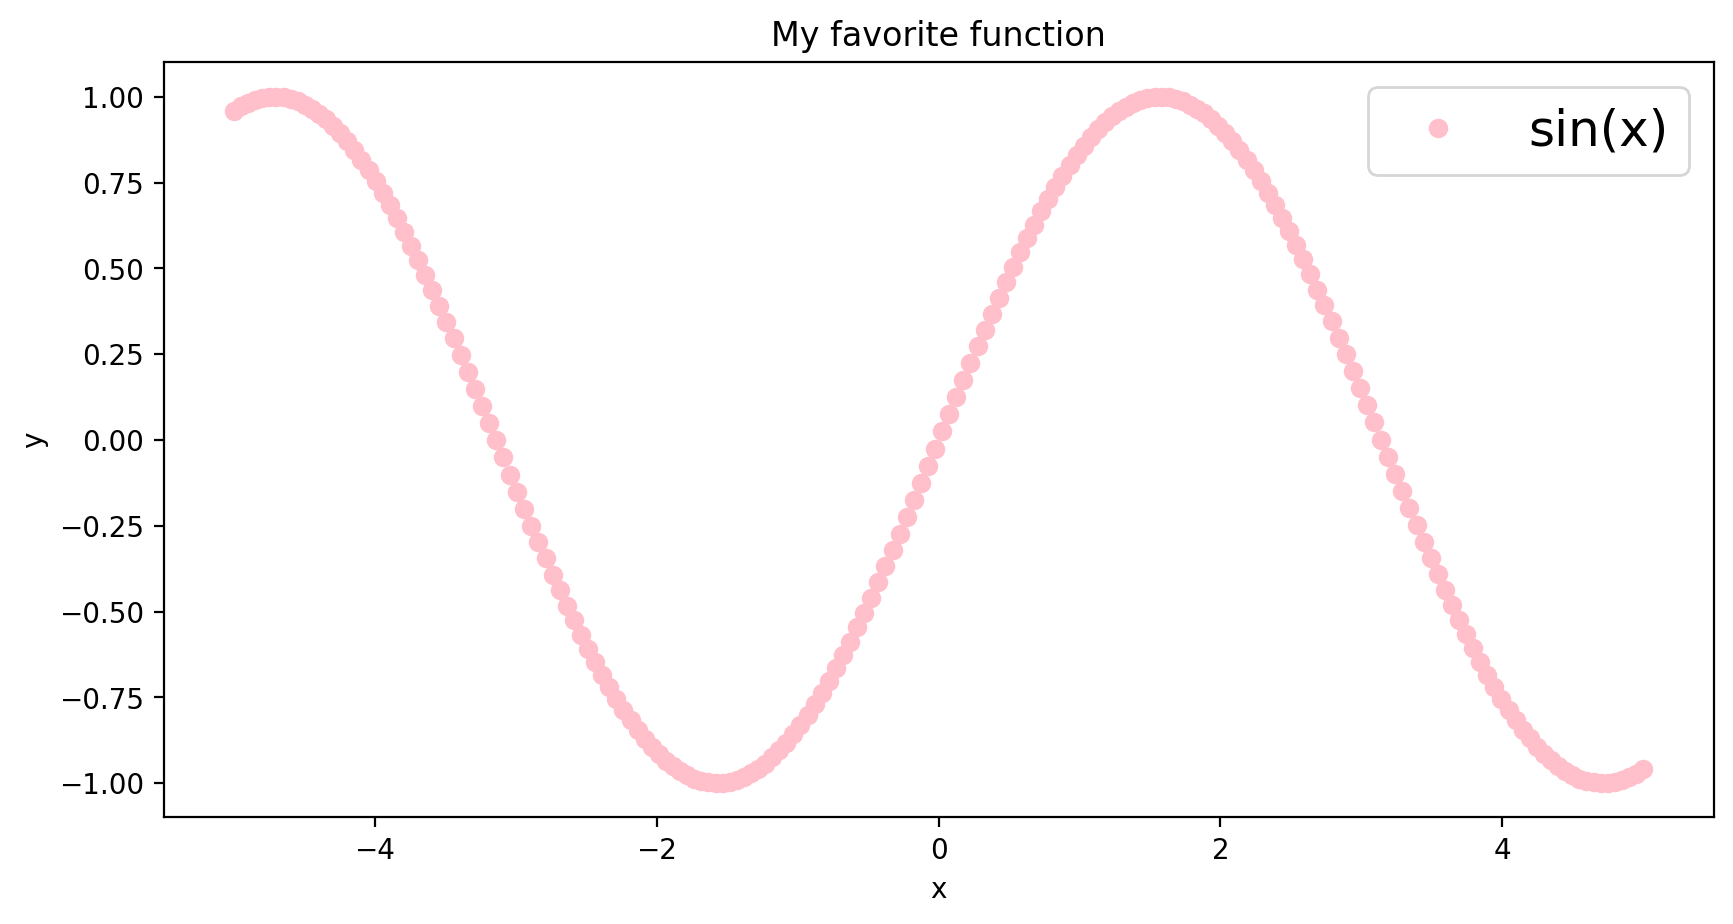

In [20]:
#Let us now plot our functions. The standard syntax for the simplest function is:

fig = plt.figure(figsize=(10,5), dpi=200)

plt.title("My favorite function")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x, y, 'o',label="sin(x)",color="pink", lw=15)
plt.legend(fontsize=18)
plt.savefig("Myfav.png")
plt.show()


### Let us remember the schrodinger equation:

### $$H \Psi_i = E_i \Psi_i$$

### Consider a simple one dimensional harmonic oscillator with one electron. The hamiltonian for this system is 

### $$\hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + x^2 $$

### We will establish a matrix representation of the Hamiltonian starting with the kinetic operator $\hat{T}$. 
If our grid has N points, then all possible linear operators are represented by NxN matrices. An operator $\hat{O}$ is applied to a function $f(x)$ by left multiplying it into the state as $$ \hat{O} \psi $$. 

#### How can werepresent the kinetic operator as a matrix? Let us begin with the first derivative. 

## We know that 
### $$(\frac{dx}{dy})_i = \frac{y_{i+1}-y_i}{h}$$

### We require a matrix of size (grid_size, grid_size), that applied to our fucntion $(f(x_i))$ will provide us with a derivative.

In [21]:
#We can easily do that with numpy:
    
der = np.zeros((len(x), len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            der[i,j] = -1
            
        if j == i + 1:
            der[i, j] = 1

            
#And then we divide by dx
dx = x[1] - x[0]

der /= dx

der 

array([[-19.9,  19.9,   0. , ...,   0. ,   0. ,   0. ],
       [  0. , -19.9,  19.9, ...,   0. ,   0. ,   0. ],
       [  0. ,   0. , -19.9, ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ..., -19.9,  19.9,   0. ],
       [  0. ,   0. ,   0. , ...,   0. , -19.9,  19.9],
       [  0. ,   0. ,   0. , ...,   0. ,   0. , -19.9]])

In [22]:
#A more efficient way of doing this is:
#der = -np.eye(len(x)) + np.diagflat(np.ones(len(x)-1),1)
#der \= (x[1] - x[0])
#der

#From the previous snippet we can see that we have succesfully created the desired matrix. 

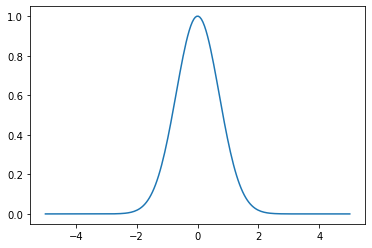

In [23]:
#Note. This expression will may diverge at the end points. 
y1 = np.exp(-x**2)
plt.plot(x, y1)

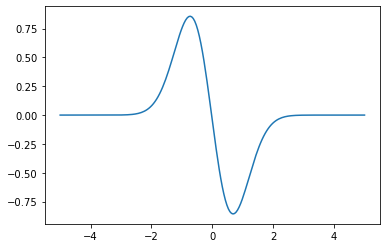

In [24]:
#We can then compute the derivative by multiplying the matrix by the function
dy_d1 = der @ y1
plt.plot(x, dy_d1)

In [25]:
#Notice how we used the operator "@". Numpy has different notations for dot product and "usual multiplication"

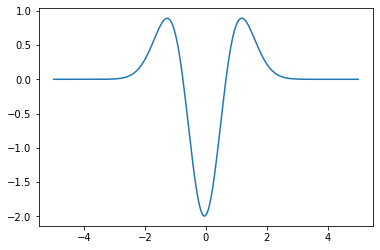

In [26]:
#We can aquire the second derivative by applying the function again
dy_d2 = der @ dy_d1
plt.plot(x, dy_d2)

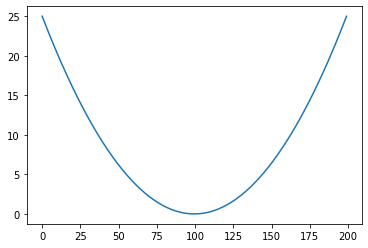

In [27]:
#Our external potential is then x**2
vext = x**2
vext_mat = np.diag(vext)

plt.plot(vext)

### As an operator by itself. The second derivative can be obtained from the first derivative matrix 

### $$ D^2_{ij} = -D_{ik} D_{jk} $$



In [28]:
#Without going into details this can be computed as :

der2 = -der @ der.T  #Where T denotes the transpose matrix
#der2[-1,-1] = der2[0,0]

In [29]:
#We can now compute the Hamiltonian 

H = (-0.5) * der2 + vext_mat

In [30]:
eig_v, eig_f = np.linalg.eigh(H)

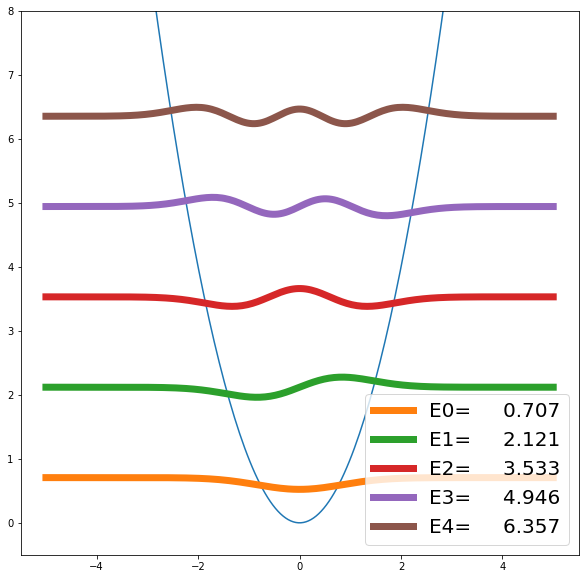

In [31]:
fig = plt.figure(figsize=(10,10))
plt.plot(x, vext)

for i in range(5):
    plt.plot(x, eig_f[:,i] + eig_v[i], label=f"E{i}={eig_v[i]:10.3f}", lw=7)

plt.ylim([-0.5,8])

plt.legend(fontsize=20)

In [32]:
#Now let us look at the density. In the previous plot we were only looking at the wavefunctions. 
#But we are always interested in the electron density. Each state should be normalized so it integrates to one. 

### $$ \int | \Psi(x) |^2 = 1 $$

You will notice that ```np.linalg.eigh``` will be different. 

How can we easily integrate numerically?
Recall the Riemann sum. Where we split the area into n rectangles with equal withds. 
This reduces to:

$$\int_a^b f(x) dx \approx \sum_i^n f(x_i)\Delta x$$

In [33]:
integral = (eig_f[:,i]**2).sum() * (x[1]-x[0])
print(integral)

0.05025125628140702


In [34]:
#Calculating integrals for one dimensional evenly spaced grids is extremely easy. 

for i in range(len(eig_v)):
    integral = (eig_f[:,i]**2).sum()*(x[1]-x[0])
    eig_f[:,i] /= np.sqrt(integral)

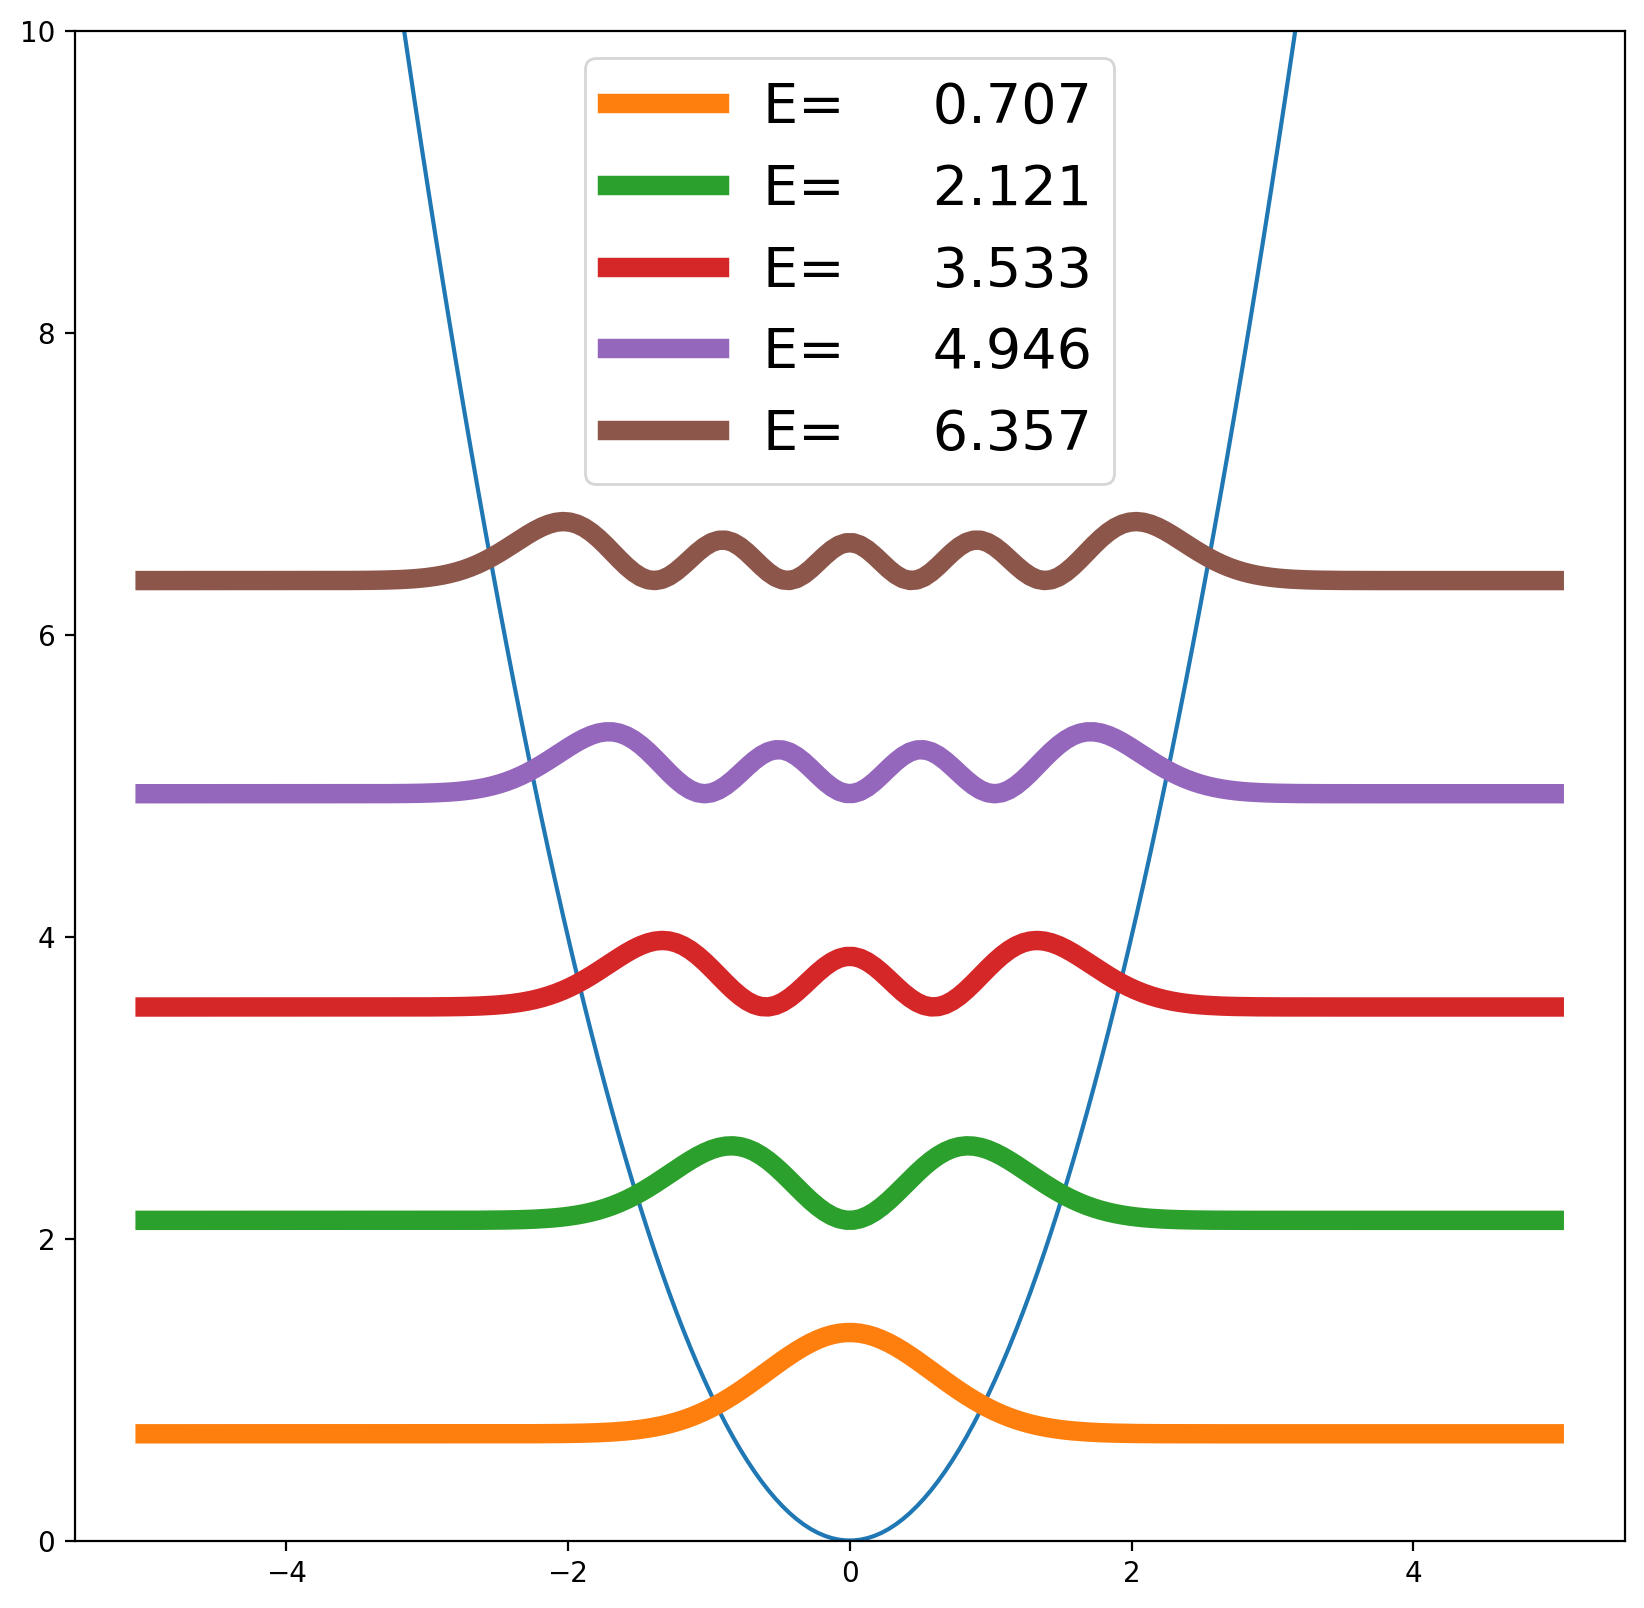

In [35]:
plt.figure(figsize=(10,10), dpi=200)
plt.plot(x, vext)

for i in range(5):
    plt.plot(x, (eig_f[:,i])**2 + eig_v[i], label=f"E={eig_v[i]:10.3f}", lw=7)

plt.ylim([-0,10])

plt.legend(fontsize=20)
plt.savefig("harmon.png")
plt.show()

### References:

    - Molssi Python tutorial:
        https://molssi-education.github.io/python_scripting_cms/index.html
            
    -1D DFT Code:
        http://dcwww.camd.dtu.dk/~askhl/files/python-dft-exercises.pdf